# ICR Competition on Kaggle
### *By Gabriel Vasconcelos*

We start by importing the necessary libraries

In [1]:
import os
import random
import statistics
from tqdm import tqdm
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import early_stopping
from catboost import CatBoostClassifier
import optuna

#

import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The code in the next cell should only be commented/uncommented to run on kaggle or on the local machine.

In [2]:
"""
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"""

'\n# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session\n\n'

# Data

In this section, we are going to import, analyze and handle/manipulate the data.

### Data Reading

*Important!! The code below should be commented/uncommented in order to run on the Kaggle environment or on the local machine.*

In [3]:
#df_train = pd.read_csv(f"{dirname}/train.csv")
#df_test = pd.read_csv(f"{dirname}/test.csv")
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

Some columns in our data have a few spaces (' '), so we can remove them altogether.

In [5]:
names = df_train.columns.tolist()
features = [x.replace(' ', '') for x in names]
df_train.columns = features

names = df_test.columns.tolist()
features = [x.replace(' ', '') for x in names]
df_test.columns = features

### Data Exploration

First, let's impute the 'EJ' object column into 2 new numeric columns by the method of One Hot Encoding.

In [6]:
def encode_column(df, obj_column):
    encoder = OneHotEncoder()
    encoded_features = encoder.fit_transform(df[[obj_column]])
    d_EJ = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out([obj_column]))
    print(f"New Columns: {encoder.get_feature_names_out([obj_column])}")
    
    # Drop the former columns and append the new ones
    df = df.drop(columns=[obj_column], axis=1)
    df = pd.concat([df, d_EJ], axis=1)
    
    
    cols = df.columns.tolist()
    if('Class' in df.columns):
        cols = cols[:-3] + cols[-2:] + [cols[-3]]

    
    df = df[cols]
    return df

In order to have a Training set and Test Set of same shape, we must manipulate the data.

In [7]:
# This cell is only a debug to use in the testing set of 5 samples
pd.options.mode.chained_assignment = None  # default='warn'

if len(df_test['EJ'].unique()) == 1:
    df_test['EJ'][0] = 'A'
    df_test['EJ'][1] = 'B'

In [8]:
# # OUT OF ORDER
# if "EJ_B" not in df_test.columns:
#     df_test["EJ_B"] = df_test["EJ_A"]-1
# if "EJ_A" not in df_test.columns:
#     df_test["EJ_A"] = df_test["EJ_B"]-1

In [9]:
df_train = encode_column(df_train, 'EJ')
df_test = encode_column(df_test, 'EJ')

New Columns: ['EJ_A' 'EJ_B']
New Columns: ['EJ_A' 'EJ_B']


Here is our new dataset (we are also going to drop de 'Id' column):

In [10]:
df_train = df_train.drop(columns=['Id'])
df_test_id = df_test[['Id']]
df_test = df_test.drop(columns=['Id'])
df_train.head(3)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FS,GB,GE,GF,GH,GI,GL,EJ_A,EJ_B,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,0.0,1.0,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,1.0,0.0,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0.0,1.0,0


Below, we have the columns containing null values and their distribution.

In [11]:
na_columns=[]
for i in df_train:
  if df_train[i].isna().any():
    na_columns = na_columns + [str(i)]
    
na_columns

['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']

Let's fill the missing values with the median of each column.

In [12]:
#df_train = df_train.fillna(df_train.median())
#df_test = df_test.fillna(df_test.median())

Below, we have the distribution of all the data in the training dataset and their relation to the target class.

In [13]:
sns.set_theme(style="whitegrid")

def plot_distributions(x, data):
    fig, axes = plt.subplots(4, 3, figsize = (30, 15))
    
    num_plots = len(x)
    
    for i in range(num_plots):
        ax = fig.add_subplot(4,3,i+1)
        sns.kdeplot(x = x[i], hue = 'Class', data = data, fill = True, warn_singular=False)

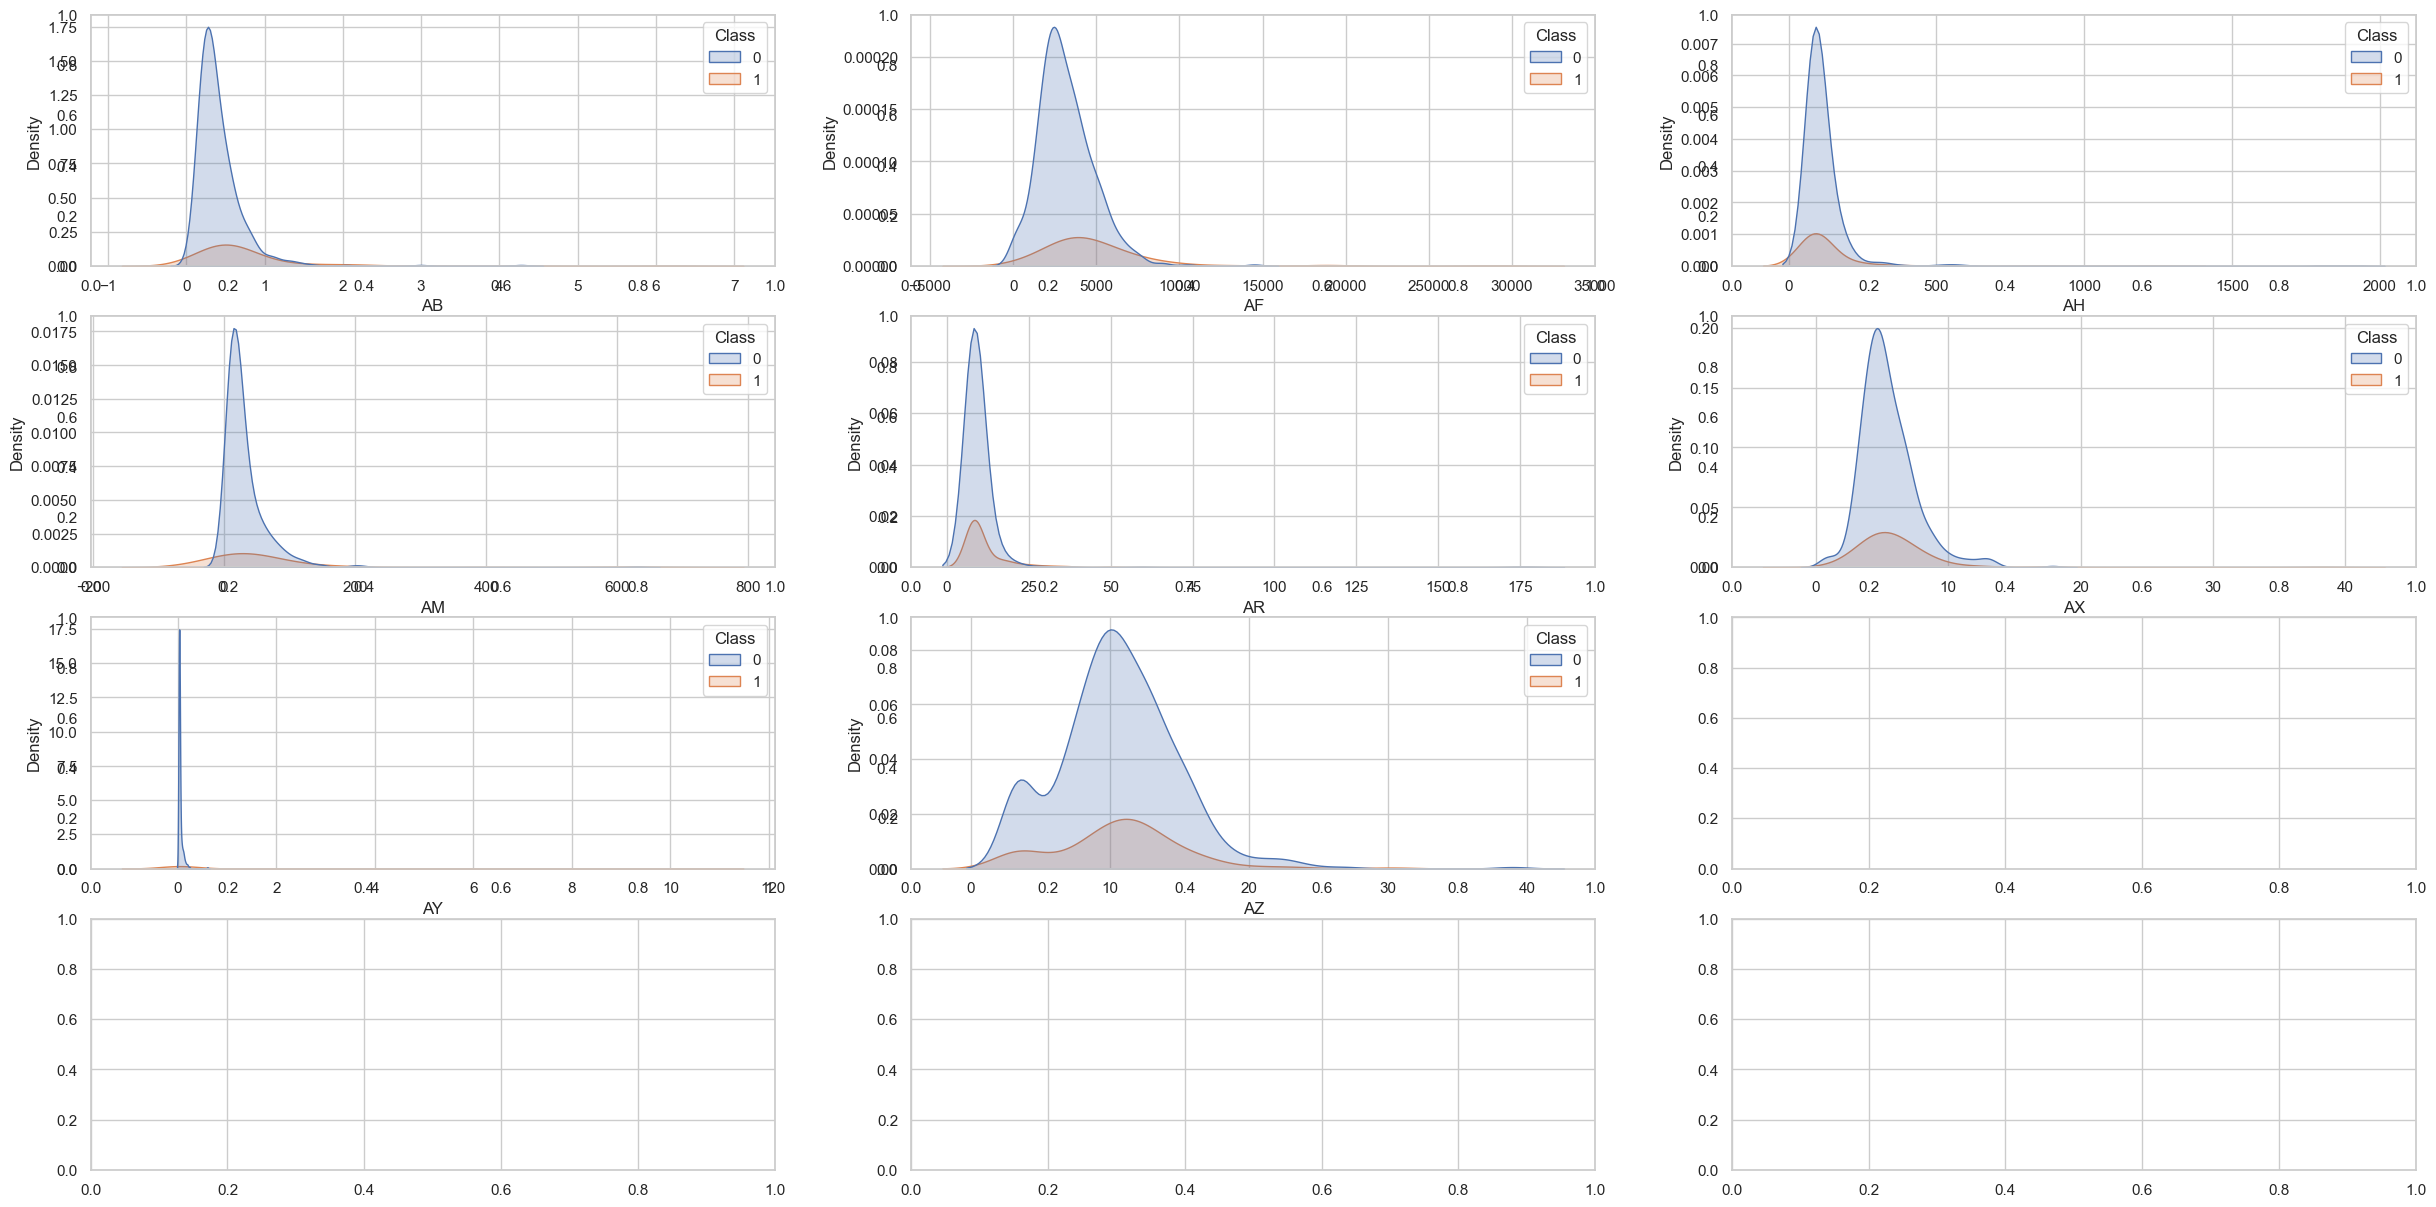

In [14]:
# Plot A distributions
plot_distributions(list(df_train.loc[:, df_train.columns.str.startswith('A')].columns), df_train)

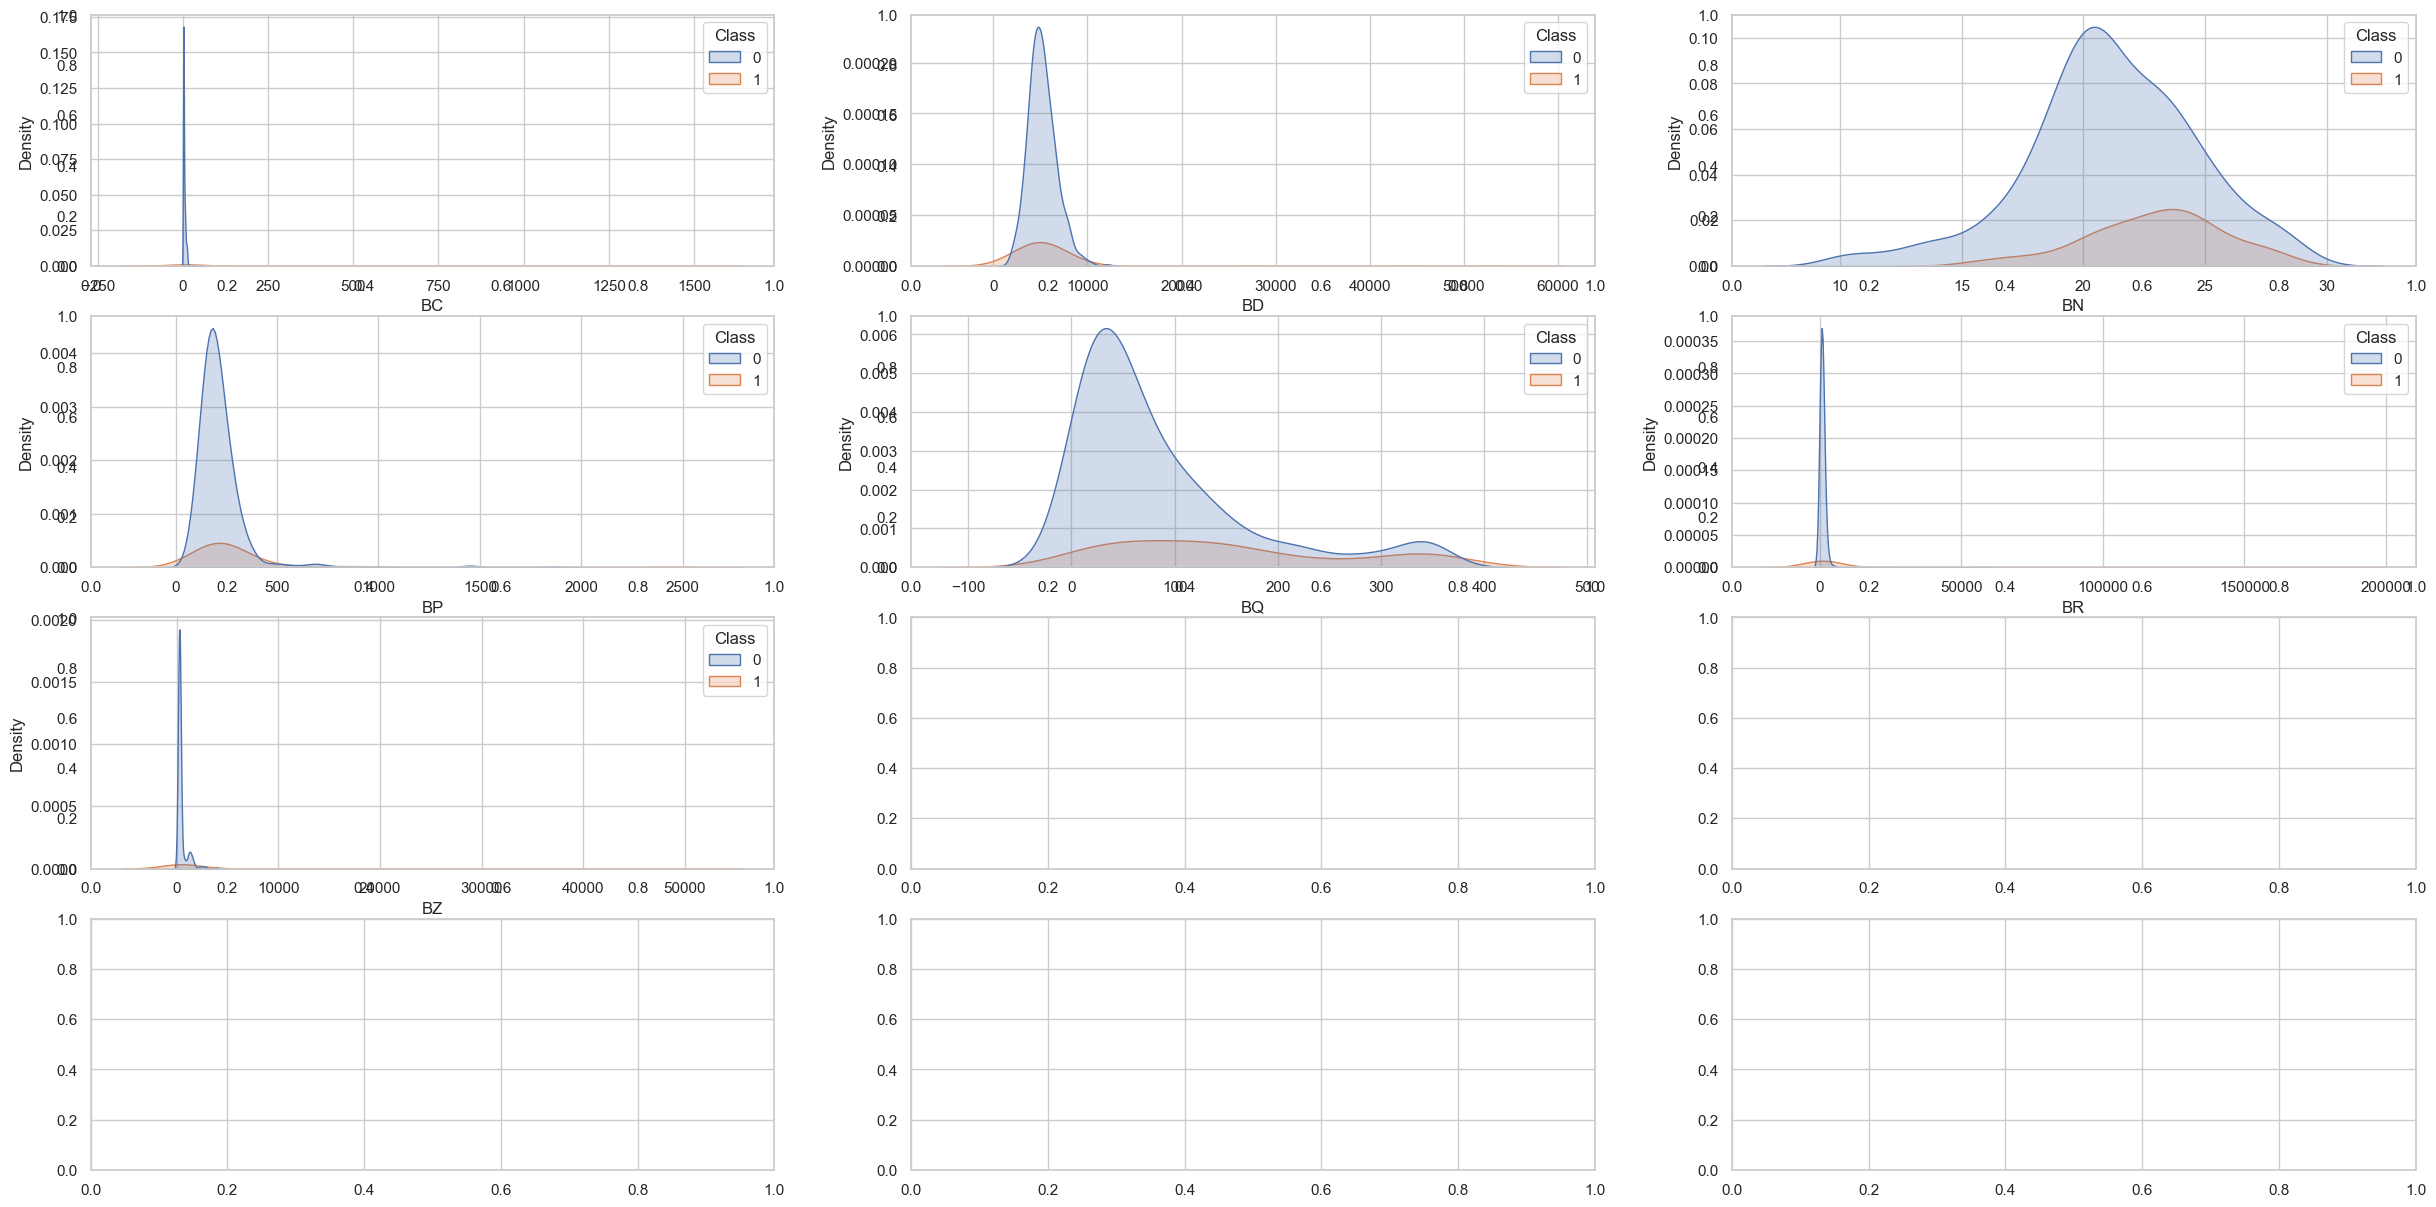

In [15]:
# Plot B distributions
plot_distributions(list(df_train.loc[:, df_train.columns.str.startswith('B')].columns), df_train)

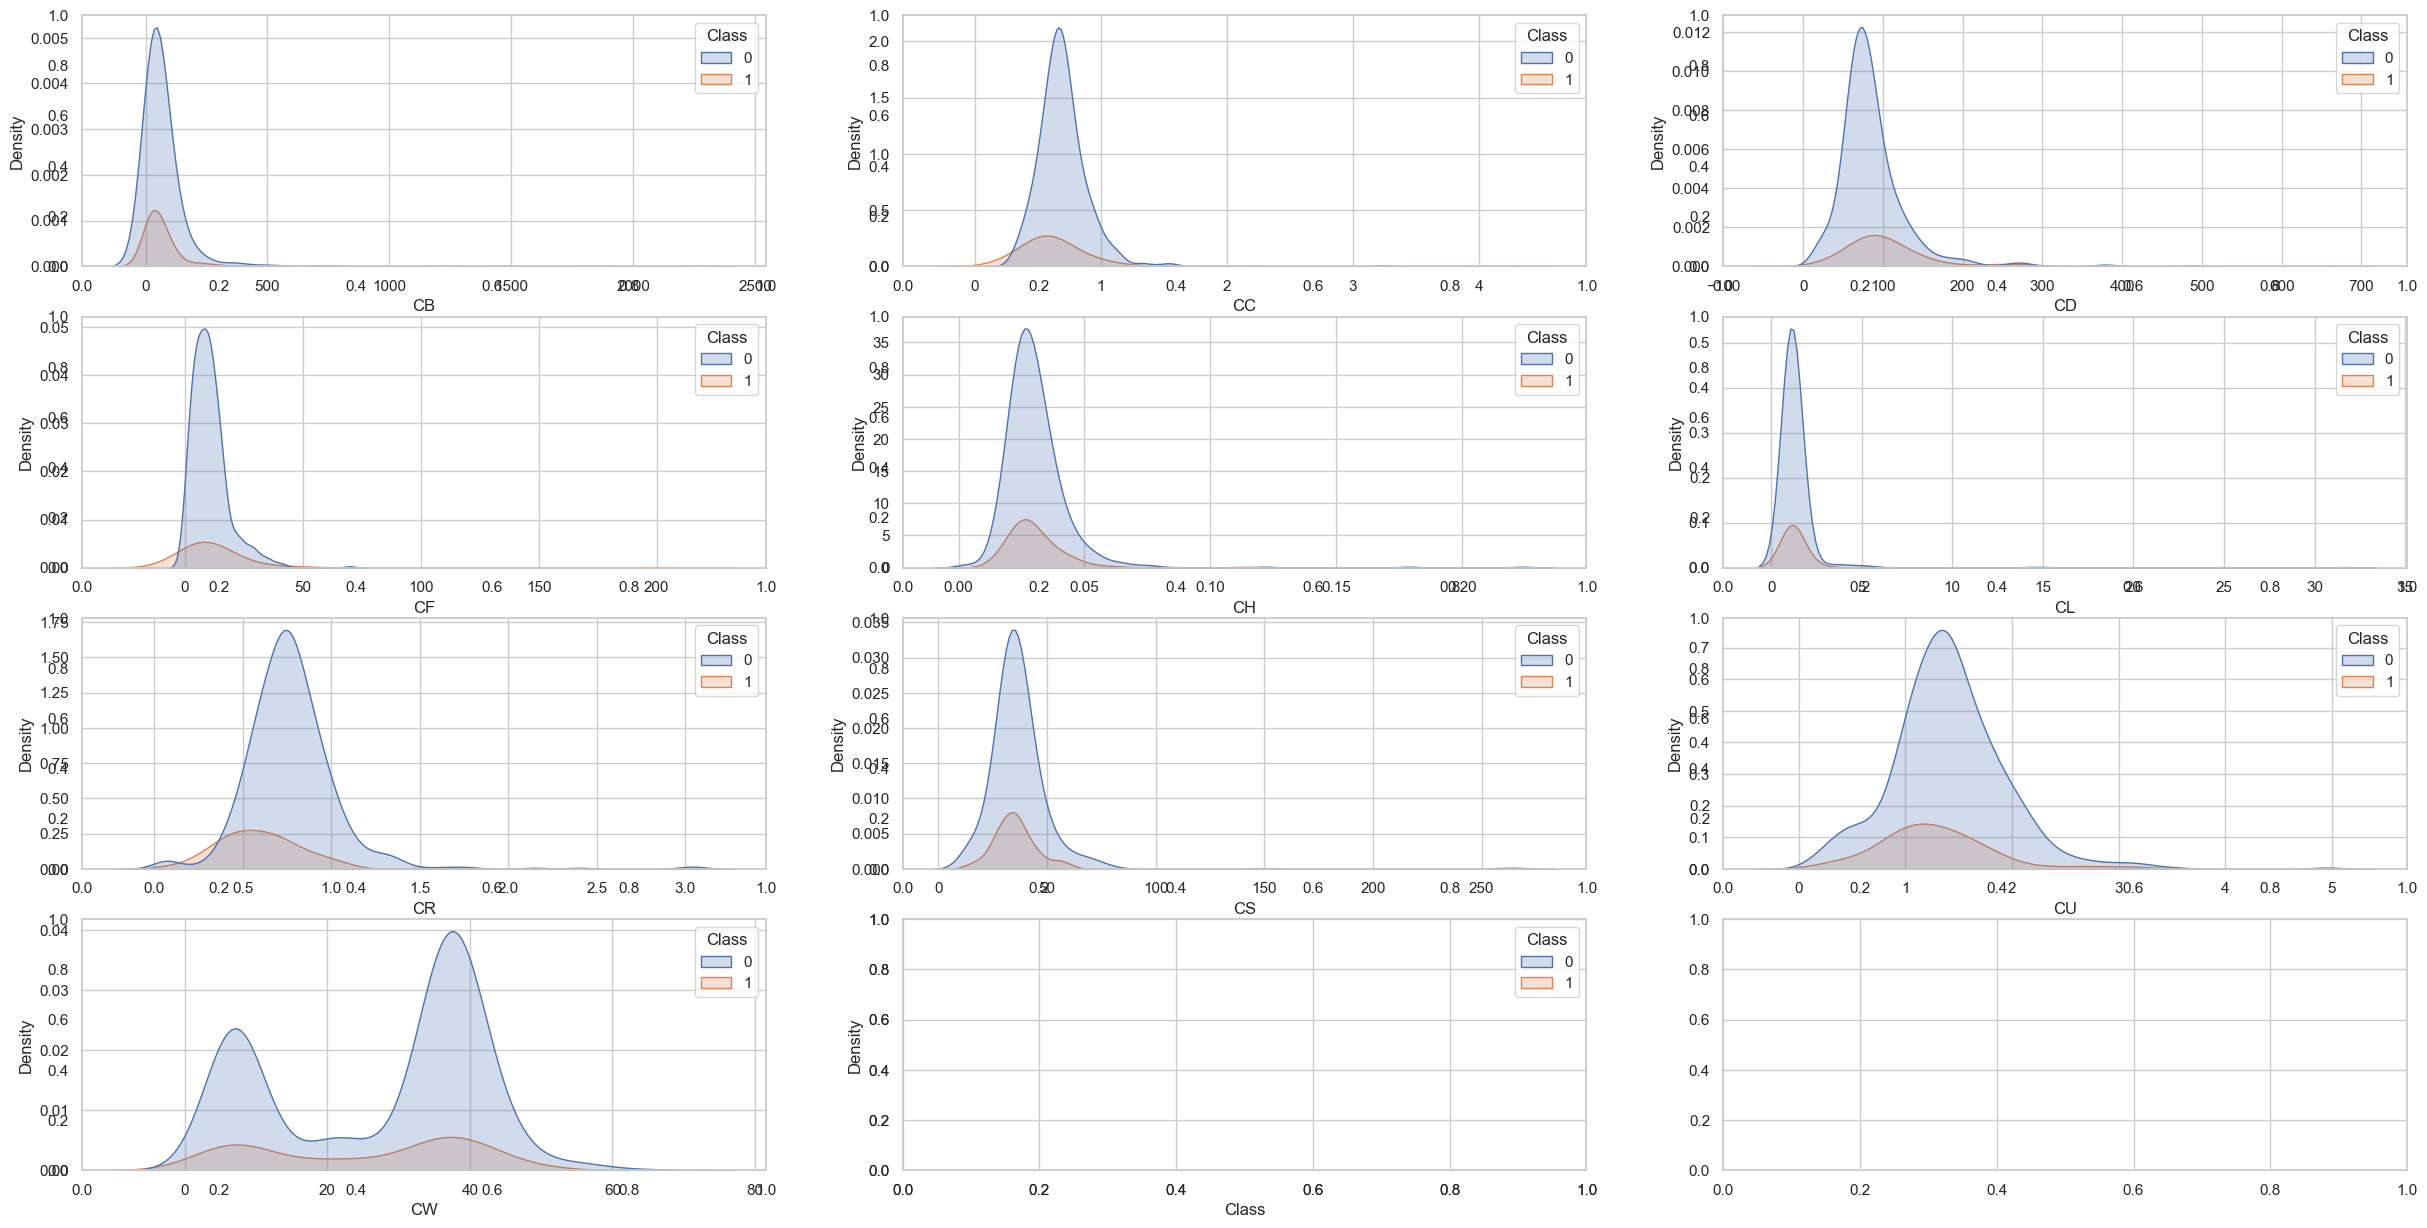

In [16]:
# Plot C distributions
plot_distributions(list(df_train.loc[:, df_train.columns.str.startswith('C')].columns), df_train)

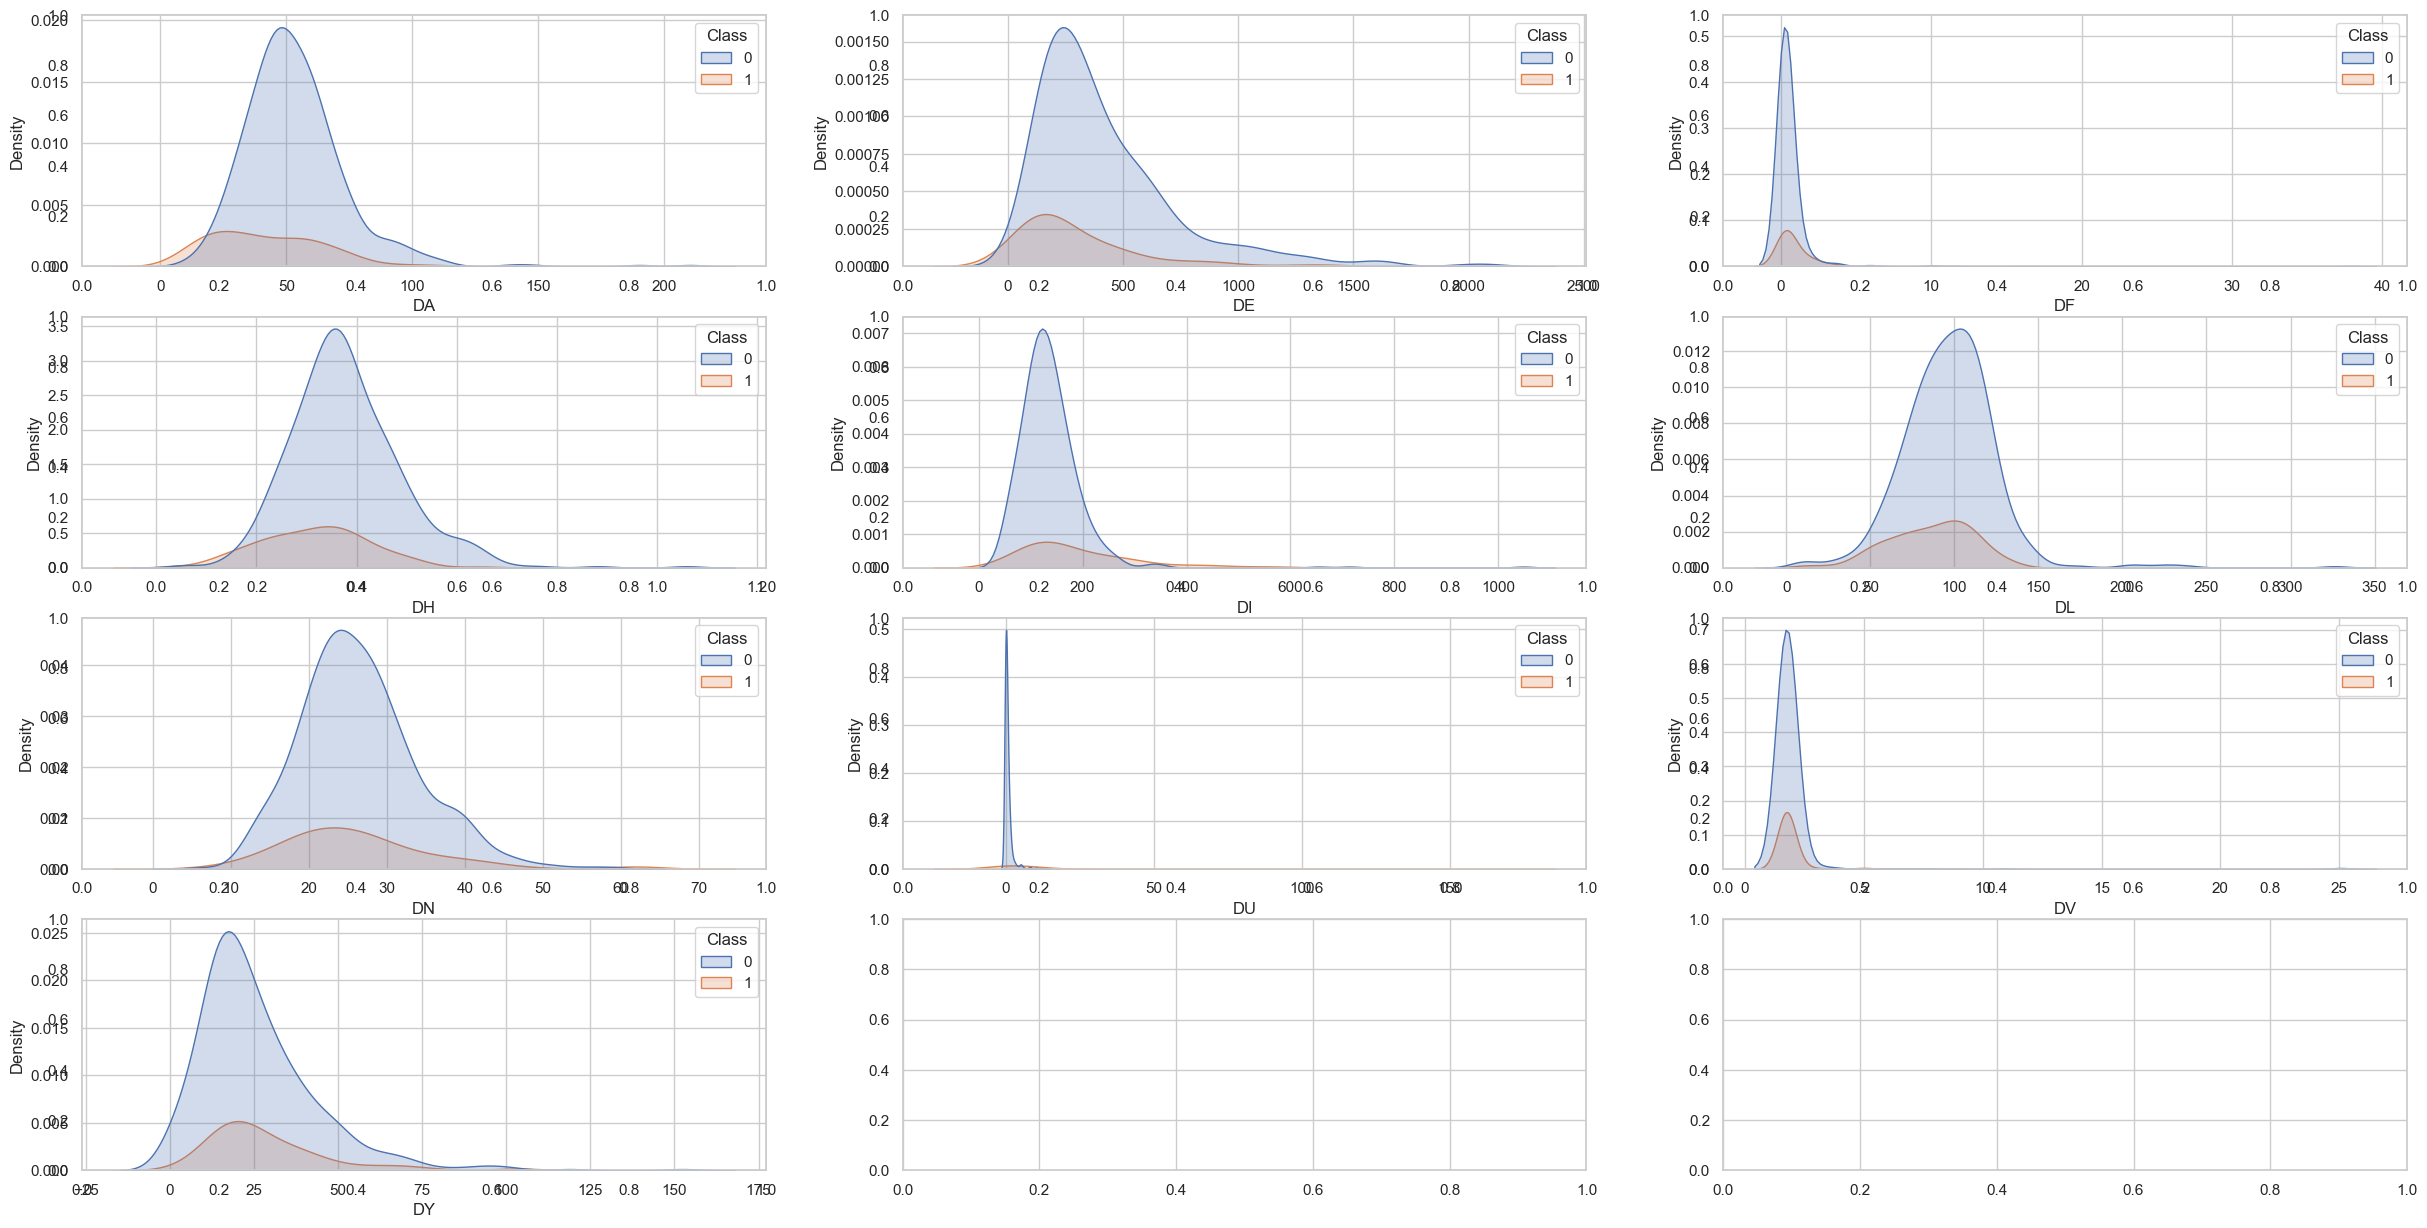

In [17]:
# Plot D distributions
plot_distributions(list(df_train.loc[:, df_train.columns.str.startswith('D')].columns), df_train)

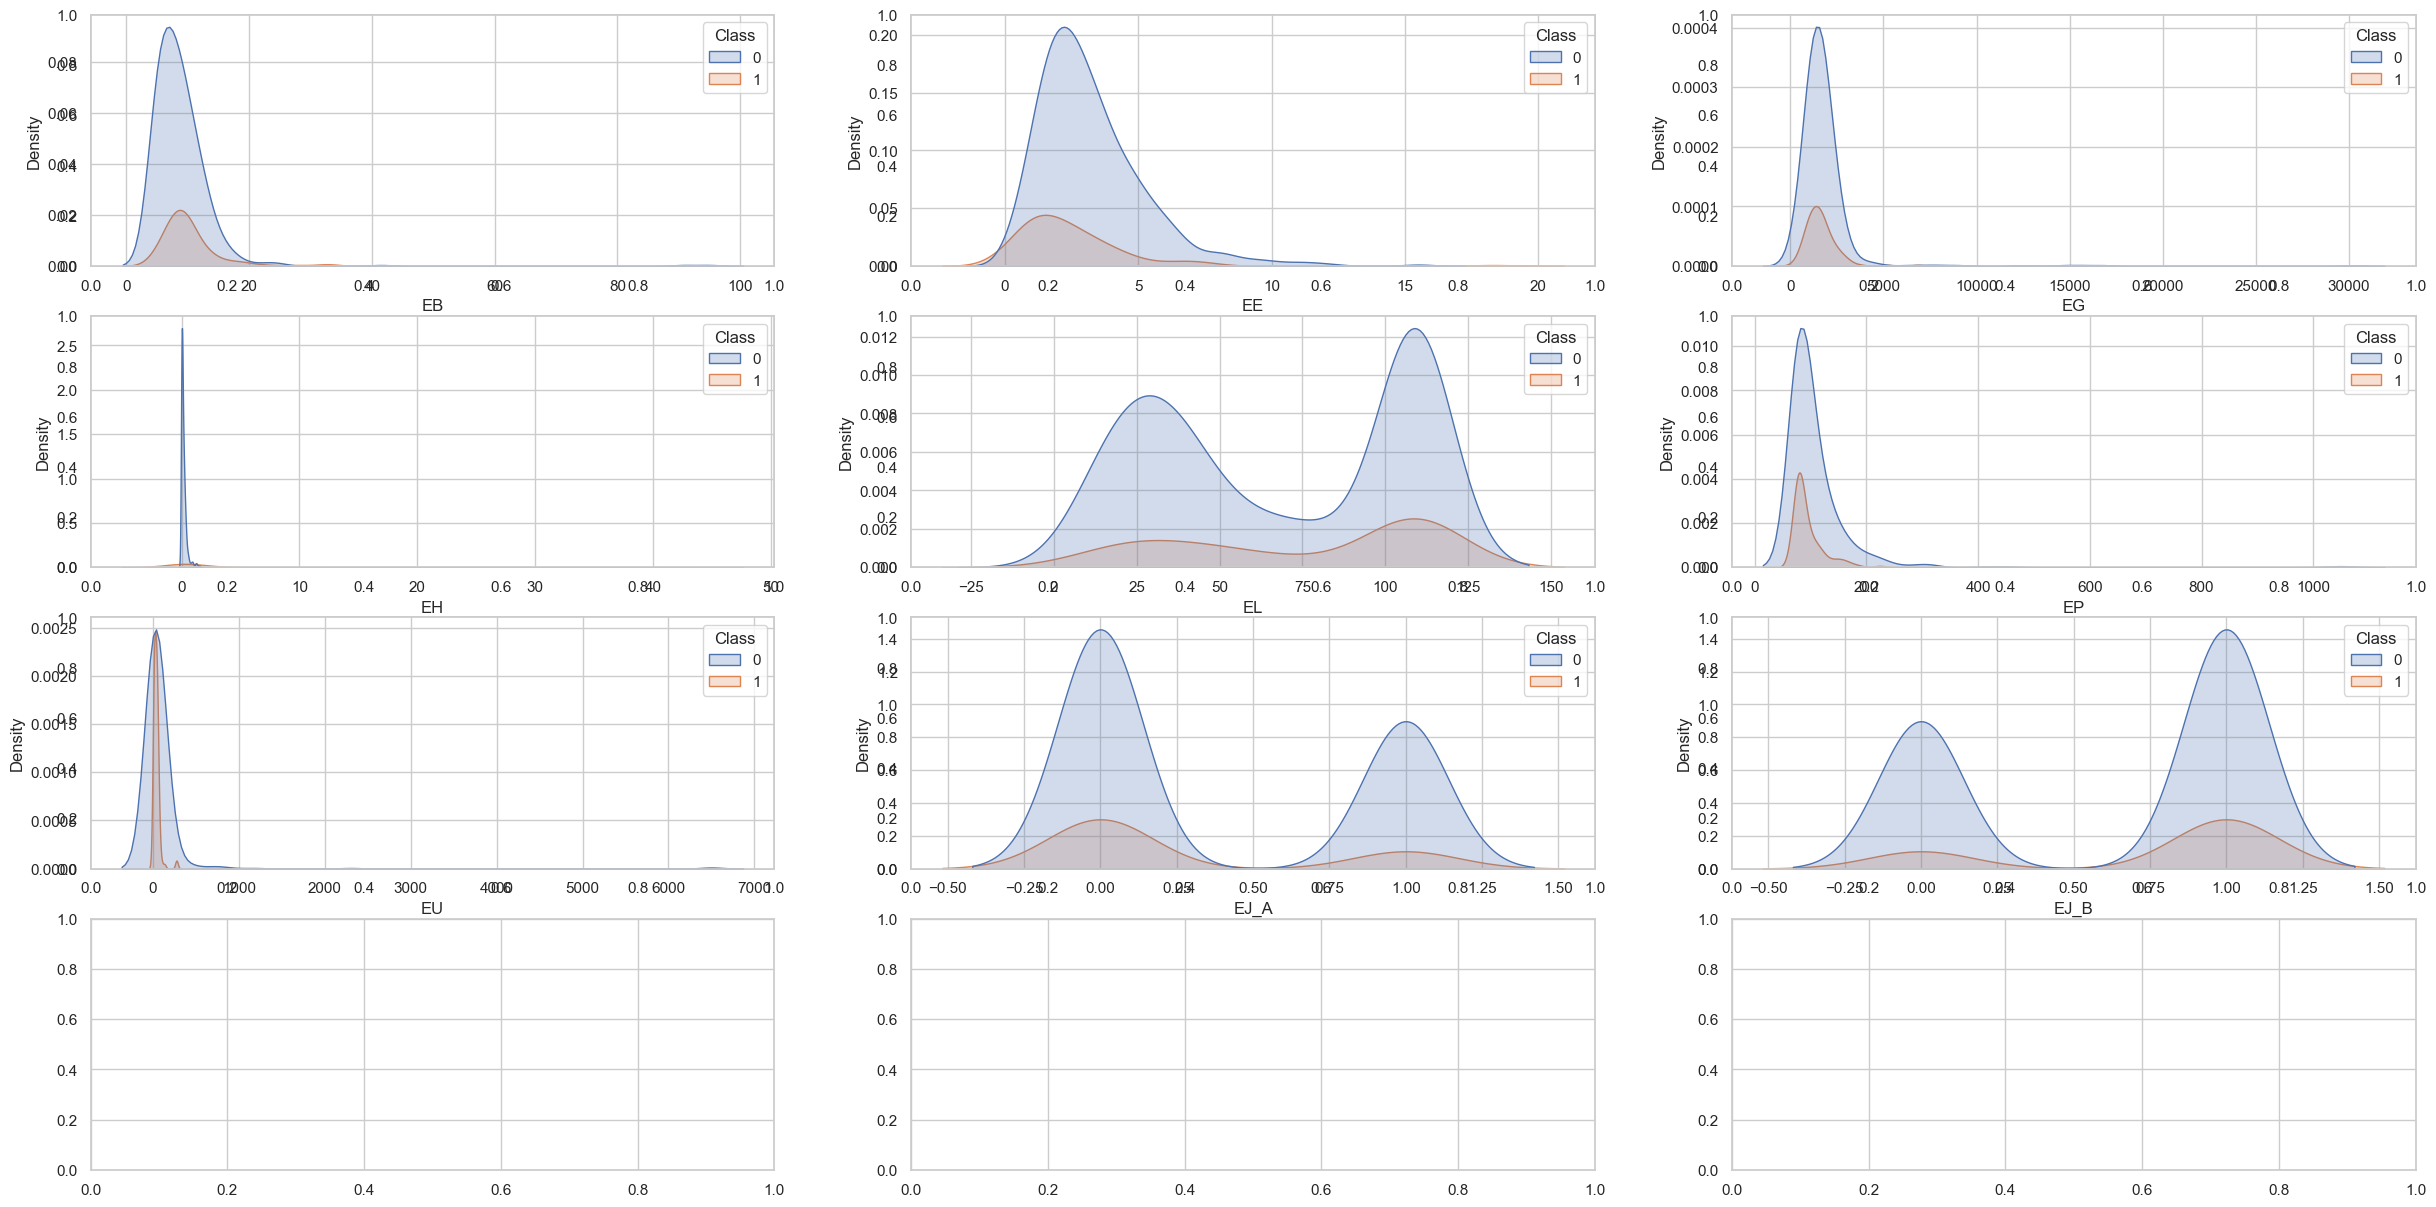

In [18]:
# Plot E distributions
plot_distributions(list(df_train.loc[:, df_train.columns.str.startswith('E')].columns), df_train)

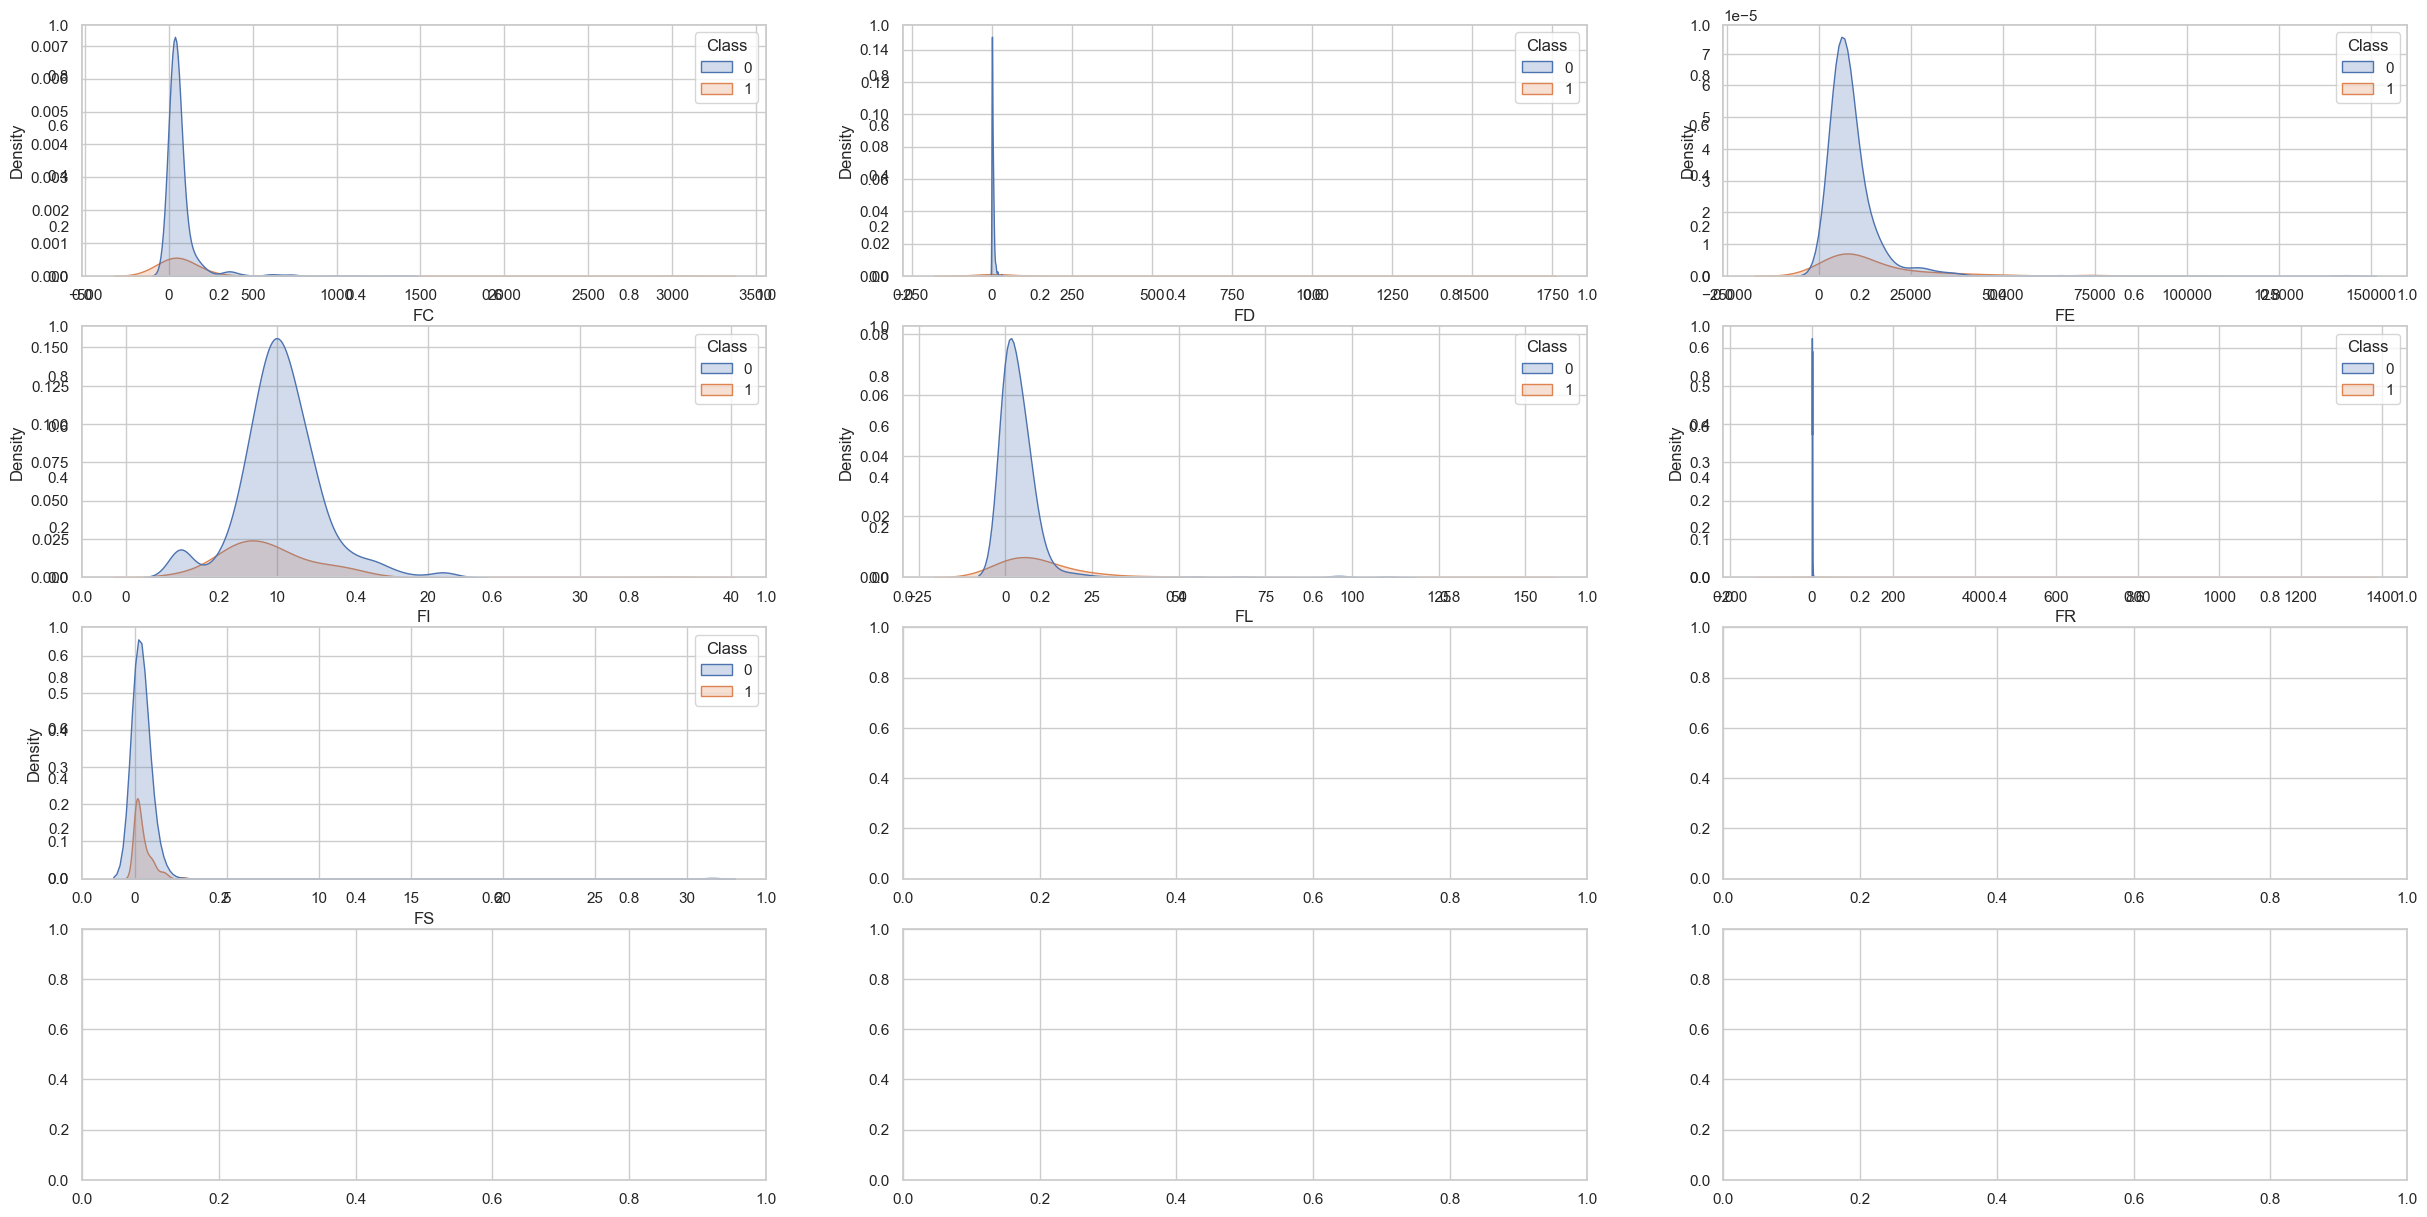

In [19]:
# Plot F distributions
plot_distributions(list(df_train.loc[:, df_train.columns.str.startswith('F')].columns), df_train)

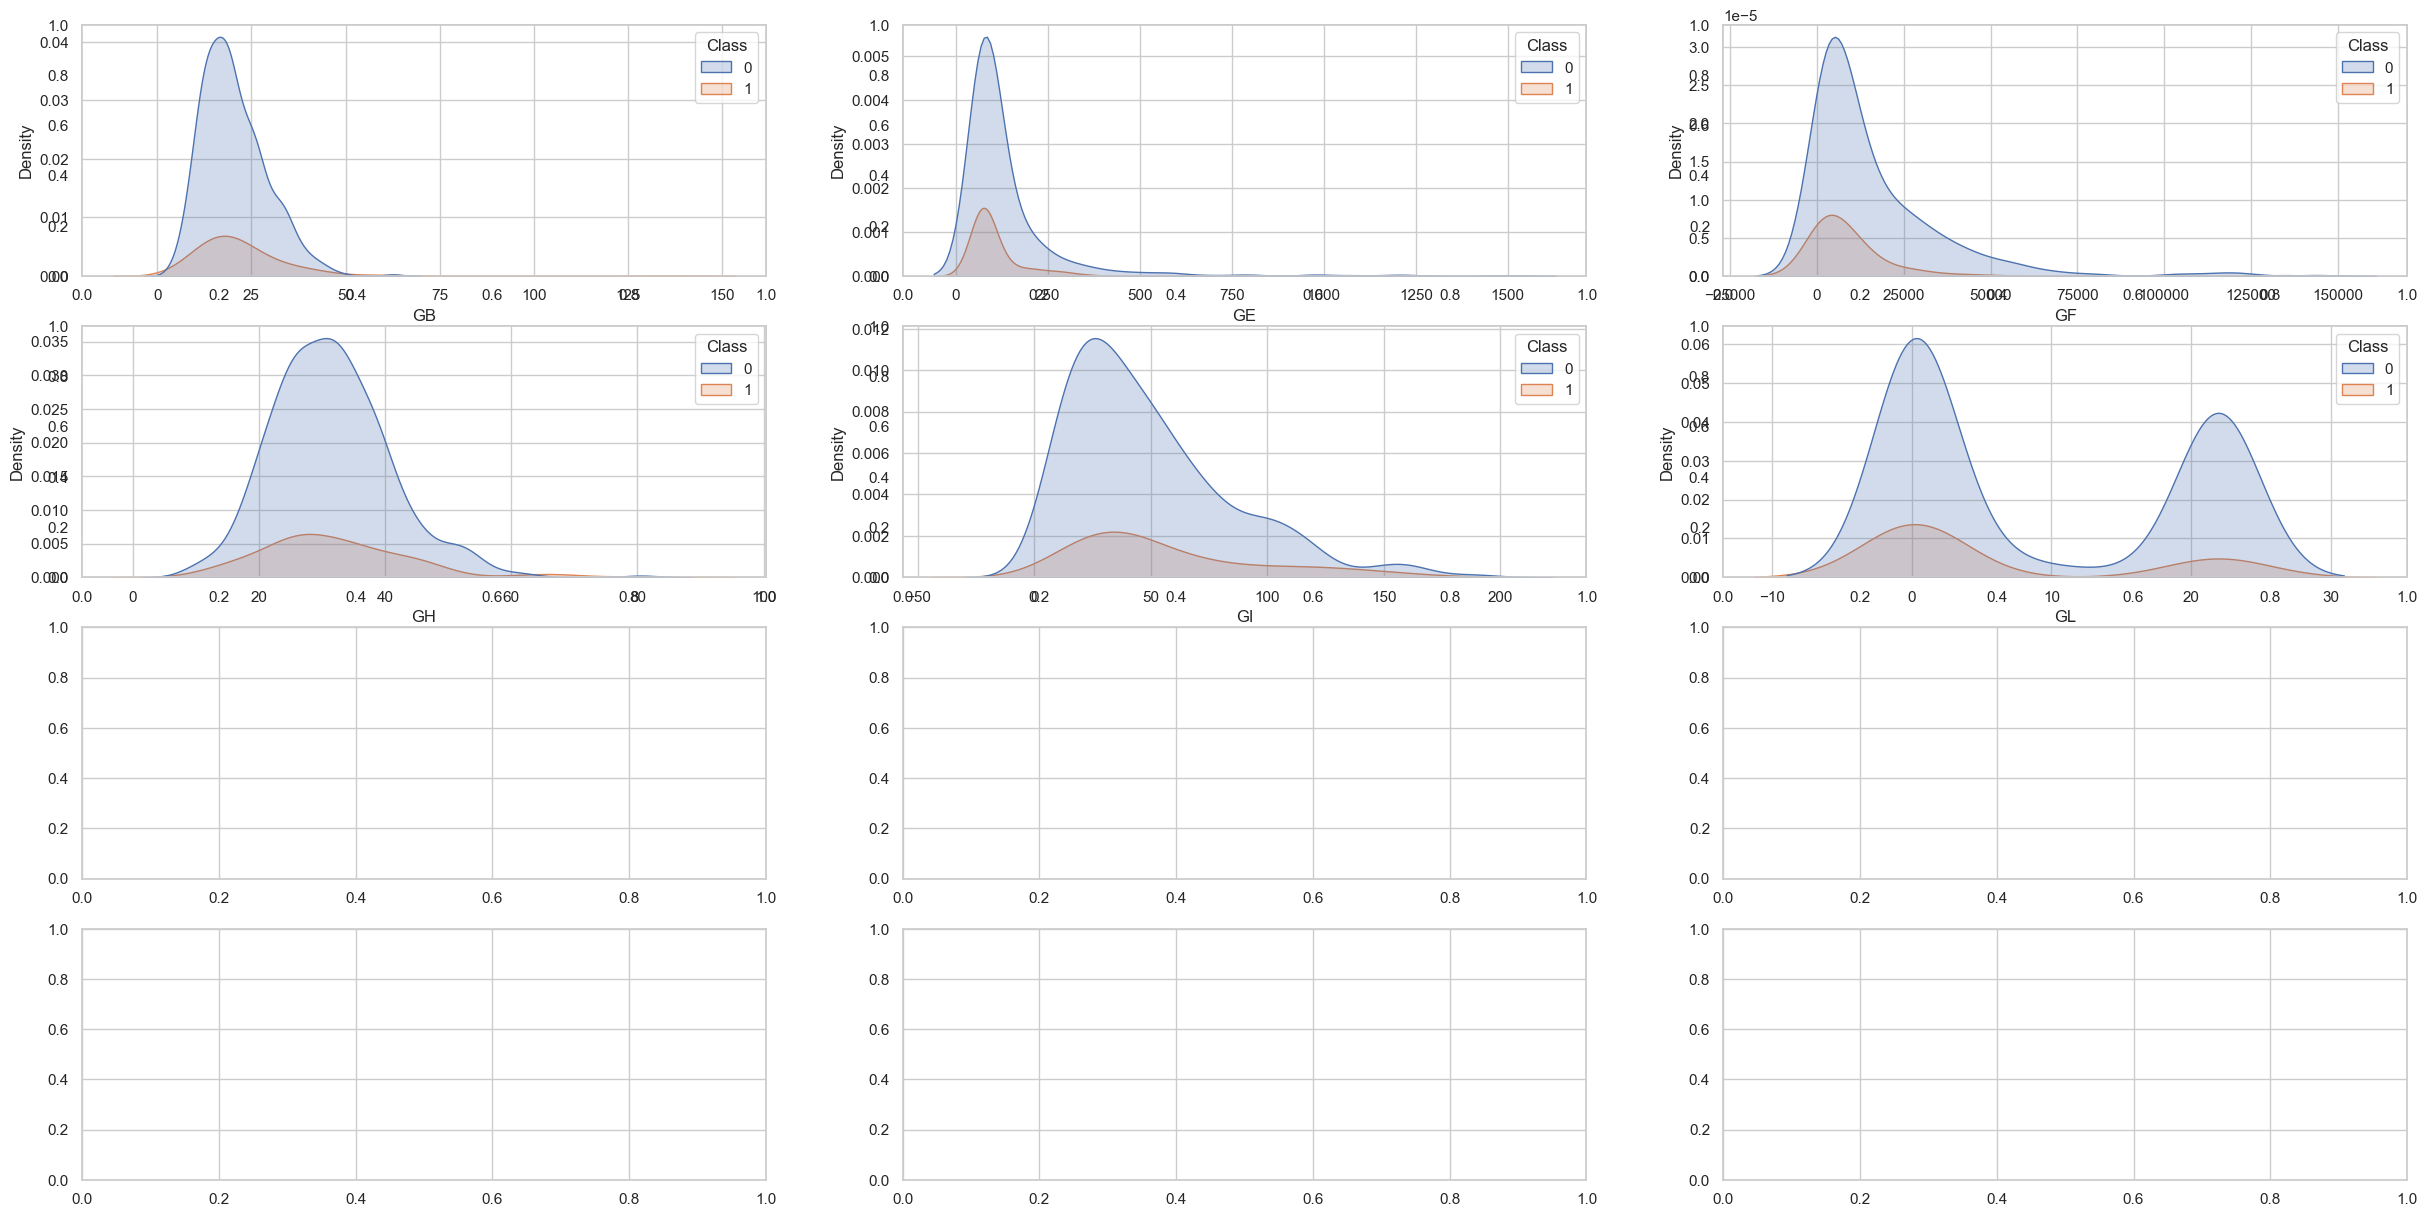

In [20]:
# Plot G distributions
plot_distributions(list(df_train.loc[:, df_train.columns.str.startswith('G')].columns), df_train)

Now, let's check the distribution of our target class

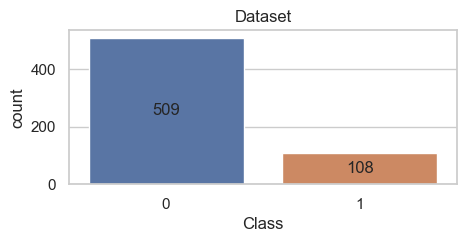

In [21]:
figure = plt.figure(figsize=(5,2))
ax = sns.countplot(data=df_train, x='Class')
ax.bar_label(ax.containers[-1], label_type='center')
plt.title("Dataset")
plt.show()

As we can see above, we have way more examples regarding the Class "0" than "1". So, in order to have a more "fair" training, we should oversample our data.

In order to do that, we are going to simply replicate the class with less occurences.

In [22]:
dfMinor = df_train[df_train["Class"]==1]
dfMajor = df_train[df_train["Class"]==0]

# First, we handle the minor data.
data_train_minor, data_val_minor, _, _ = train_test_split(dfMinor, dfMinor["Class"], test_size=0.30, random_state=42)

# Second, we handle the major data.
data_train_major, data_val_major, _, _ = train_test_split(dfMajor, dfMajor['Class'], test_size=0.30, random_state=42)

# Following, we have the difference of intances of the major training class and the minor.
difference_train = data_train_major.shape[0] - data_train_minor.shape[0]

# After replicating more than 2 times, we would also have to add 56 more instances for them to have the same amount
difference_train_lower = difference_train - 3*data_train_minor.shape[0]

data_train_minor_sampled = pd.concat([data_train_minor, data_train_minor, data_train_minor, data_train_minor, data_train_minor[:difference_train_lower]])

# Now, we do the same for the validation set. (We just repeat the same steps)
difference_val = data_val_major.shape[0] - data_val_minor.shape[0]

difference_val_lower = difference_val - 3*data_val_minor.shape[0]

data_val_minor_sampled = pd.concat([data_val_minor, data_val_minor, data_val_minor, data_val_minor, data_val_minor[:difference_val_lower]])

# We now have tha same amount of intances of class "0" and class "1" for training and validation.

#print(data_train_minor_sampled.shape == data_train_major.shape)
#print(data_val_minor_sampled.shape == data_val_major.shape)
# True
# True

# At last, we concatenate the training data altogether, and also remove the index columns which will not be used for training.
data_train = pd.concat([data_train_minor_sampled, data_train_major]).sample(frac=1, random_state=42).reset_index(drop=True)

# We do the same for the validation set.
data_val = pd.concat([data_val_minor_sampled, data_val_major]).sample(frac=1, random_state=42).reset_index(drop=True)

# We want to use all of our data, so we concatenate the training and validation dataset
all_data = pd.concat([data_train, data_val]).sample(frac=1, random_state=42).reset_index(drop=True)

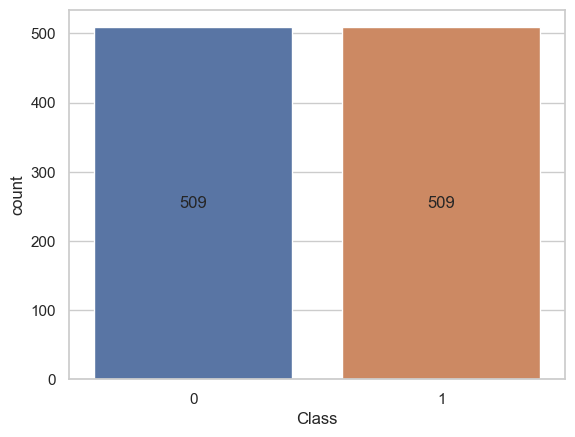

In [23]:
ax = sns.countplot(x=all_data['Class'])
ax.bar_label(ax.containers[-1], label_type='center')
plt.show()

Let's standarize the data, fill de nans and discover the weights for each feature.

In [24]:
all_data.head(3)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FS,GB,GE,GF,GH,GI,GL,EJ_A,EJ_B,Class
0,6.161666,18964.47278,210.557493,85.393581,8.138688,17.983770,0.032886,8.866914,6.767964,7259.05083,...,NaN,31.636102,296.036174,12261.84415,49.586046,39.457052,21.978000,1.0,0.0,1
1,0.341840,1570.03913,85.200147,28.932174,8.138688,3.933396,0.038671,10.599964,1.229900,4091.39136,...,0.203190,6.623024,72.611063,14687.68642,15.003072,43.996632,0.051449,0.0,1.0,1
2,0.307656,2472.39663,85.200147,24.181376,16.327194,7.104918,0.025578,8.992954,3.032582,4242.76990,...,0.521521,11.962372,1187.384566,11182.90957,25.213496,113.710692,0.131305,0.0,1.0,0


In [25]:
FEATURES = []
# SAVE MEANS, STDS, NANS FOR TEST INFERENCE LATER
means = {}; stds = {}; nans = {}

In [26]:
# For Training
for c in all_data.columns[:-1]:
    m = all_data[c].mean()
    means[c] = m
    s = all_data[c].std()
    stds[c] = s
    all_data[c] = (all_data[c]-m)/s
    n = all_data[c].min() - 0.5
    nans[c] = n
    all_data[c] = all_data[c].fillna(n)
    FEATURES.append(c)
    
# For Testing
for c in df_test.columns:
    m = means[c]
    s = stds[c]
    df_test[c] = (df_test[c]-m)/s
    n = nans[c]
    df_test[c] = df_test[c].fillna(n)

In [27]:
all_data.columns[:-1]

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD', 'FE', 'FI', 'FL', 'FR',
       'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'EJ_A', 'EJ_B'],
      dtype='object')

In [28]:
df_test.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD', 'FE', 'FI', 'FL', 'FR',
       'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'EJ_A', 'EJ_B'],
      dtype='object')

In [29]:
all_data.head(3)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FS,GB,GE,GF,GH,GI,GL,EJ_A,EJ_B,Class
0,8.554442,4.823929,0.62322,0.301630,-0.274351,3.772488,-0.076134,-0.392248,-0.091835,0.351493,...,-0.836742,0.823735,1.369229,-0.014773,1.658359,-0.352578,1.443677,1.466148,-1.466148,1
1,-0.386921,-0.831517,-0.28781,-0.239692,-0.274351,-0.559244,-0.067168,-0.003296,-0.141091,-0.331917,...,-0.208854,-1.205176,-0.399637,0.118912,-1.569557,-0.232863,-0.730047,-0.681390,0.681390,1
2,-0.439441,-0.538133,-0.28781,-0.285241,0.593175,0.418537,-0.087459,-0.363960,-0.125058,-0.299258,...,0.091682,-0.772080,8.426074,-0.074232,-0.616533,1.605590,-0.722131,-0.681390,0.681390,0


In [30]:
df_test.head(3)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FR,FS,GB,GE,GF,GH,GI,GL,EJ_A,EJ_B
0,-0.912112,-1.341983,-0.906998,-0.517079,-1.136599,-1.77191,-0.127096,-2.382265,-0.15203,-1.214619,...,-0.091506,-0.400686,-1.742396,-0.974502,-0.690508,-2.969919,-1.393113,-0.735148,1.466148,-1.466148
1,-0.912112,-1.341983,-0.906998,-0.517079,-1.136599,-1.77191,-0.127096,-2.382265,-0.15203,-1.214619,...,-0.091506,-0.400686,-1.742396,-0.974502,-0.690508,-2.969919,-1.393113,-0.735148,-0.681390,0.681390
2,-0.912112,-1.341983,-0.906998,-0.517079,-1.136599,-1.77191,-0.127096,-2.382265,-0.15203,-1.214619,...,-0.091506,-0.400686,-1.742396,-0.974502,-0.690508,-2.969919,-1.393113,-0.735148,1.466148,-1.466148


Finally, we discover the weights for each feature. (OUT OF ORDER)

In [31]:
# weights_model = RandomForestClassifier()
# weights_model.fit(all_data[FEATURES], all_data['Class'])

In [32]:
# feature_importances = weights_model.feature_importances_
# feature_importances

Now, we apply those weights into the dataset. (OUT OF ORDER)

In [33]:
# # For Training
# for i,f in enumerate(FEATURES):
#     all_data[f] *= feature_importances[i]
    
# # For Testing
# for i,f in enumerate(FEATURES):
#     df_test[f] *= feature_importances[i]

In [34]:
all_data.head(3)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FS,GB,GE,GF,GH,GI,GL,EJ_A,EJ_B,Class
0,8.554442,4.823929,0.62322,0.301630,-0.274351,3.772488,-0.076134,-0.392248,-0.091835,0.351493,...,-0.836742,0.823735,1.369229,-0.014773,1.658359,-0.352578,1.443677,1.466148,-1.466148,1
1,-0.386921,-0.831517,-0.28781,-0.239692,-0.274351,-0.559244,-0.067168,-0.003296,-0.141091,-0.331917,...,-0.208854,-1.205176,-0.399637,0.118912,-1.569557,-0.232863,-0.730047,-0.681390,0.681390,1
2,-0.439441,-0.538133,-0.28781,-0.285241,0.593175,0.418537,-0.087459,-0.363960,-0.125058,-0.299258,...,0.091682,-0.772080,8.426074,-0.074232,-0.616533,1.605590,-0.722131,-0.681390,0.681390,0


Let's also divide our data in X and Y.

In [35]:
X_train = all_data.drop(columns = ['Class'], axis = 1)
y_train = all_data['Class']

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = df_test.to_numpy()

Finally, we need to scaled the data that will be worked upon (OUT OF ORDER).

*PS.: Since our Y is binary, it does not need to be scaled. (OUT OF ORDER)*

In [36]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

# Models

We fix the seeds in order to get reproductible results.

In [37]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    
seed_everything(42)

First, we oughta implement the loss function described in the competition i.e balanced logarithmic loss.

In [38]:
def balanced_logloss(y_true, y_pred):
    
    y_pred = np.stack([1-y_pred,y_pred]).T
    y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
    y_pred / np.sum(y_pred, axis=1)[:, None]
    nc = np.bincount(y_true)
    
    logloss = (-1/nc[0]*(np.sum(np.where(y_true==0,1,0) * np.log(y_pred[:,0]))) - 1/nc[1]*(np.sum(np.where(y_true!=0,1,0) * np.log(y_pred[:,1])))) / 2
    return logloss

Now, let's test the models using cross validation.

### Ensemble

In [39]:
# def create_model_params(trial):
#     catboost_params = {
#         'iterations': 500,
#         'depth': 4,
#         'learning_rate': 0.01,
#         'random_seed': 42,
#         'verbose': 0
#     }

#     xgboost_params = {
#         'objective': 'binary:logistic',
#         'eval_metric': 'logloss',
#         'booster': 'gbtree',
#         'verbosity': 0,
#         'n_jobs': -1,
#         'tree_method': 'auto',
#         'eta': trial.suggest_float('eta', 0.01, 0.3),
#         'max_depth': trial.suggest_int('max_depth', 2, 100),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'gamma': trial.suggest_float('gamma', 0.0, 1.0)
#     }
    
#     lgb_params = {
#         'objective': 'binary',
#         'metric': 'binary_logloss',
#         'boosting_type': 'gbdt',
#         'verbosity': -1,
#         'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
#         'max_depth': trial.suggest_int('max_depth', 2, 100),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
#         'num_leaves': trial.suggest_int('num_leaves', 10, 100),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
#     }
    
#     gb_params = {
#         'loss': trial.suggest_categorical('loss', ['log_loss', 'exponential']),
#         'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 5000),
#         'max_depth': trial.suggest_int('max_depth', 2, 100),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),   
#     }
    
#     rf_params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 5000),
#         'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
#         'max_depth': trial.suggest_int('max_depth', 2, 100),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 4, 10),
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
#         'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample']),
#     }
    
#     return catboost_params, xgboost_params, lgb_params, gb_params, rf_params

In [40]:
# def objective_ens(trial):
#     # Define the hyperparameters to optimize
#     catboost_params, xgboost_params, lgb_params, gb_params, rf_params = create_model_params(trial)
    
#     catboost_model = CatBoostClassifier(**catboost_params)
#     xgboost_model = XGBClassifier(**xgboost_params)
#     lgb_model = lgb.LGBMClassifier(**lgb_params)
#     gb_model = GradientBoostingClassifier(**gb_params, random_state=42, verbose=0)
#     rf_model = RandomForestClassifier(**rf_params, random_state=42, n_jobs=-1, verbose=0)
    
#     models = [
#     ('catboost', catboost_model),
#     ('xgboost', xgboost_model),
#     ('lgb', lgb_model),
#     ('gb', gb_model),
#     ('rf', rf_model)
#     ]

#     """
#     stacking_model = StackingClassifier(
#         estimators = models,
#         final_estimator = catboost_model,
#         cv = 5,
#         stack_method = 'predict_proba',
#         n_jobs = -1
#     )
#     """
    
#     final_model = VotingClassifier(estimators=[('catboost', catboost_model), 
#                                                ('xgboost', xgboost_model), 
#                                                ('lgboost', lgb_model), 
#                                                ('random_forest', rf_model), 
#                                                ('gradient_boosting', gb_model)], voting='soft', verbose=1)
    
#     skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
#     val_log_score = []
#     val_accuracy_score = []
    
#     predicted_probs = np.zeros(len(X_train))
    
#     for train_idx, val_idx in tqdm(skf.split(X_train, y_train), desc="Processing K(5) Folds"):
#         X_train_cv, y_train_cv = X_train[train_idx], y_train[train_idx]
#         X_valid_cv, y_valid_cv = X_train[val_idx], y_train[val_idx]

#         model = final_model
#         model.fit(X_train_cv, y_train_cv)

#         val_prob_preds = model.predict_proba(X_valid_cv)
#         #print(model.predict_proba(X_valid_cv)[:,1])
#         predicted_probs[val_idx] = model.predict_proba(X_valid_cv)[:,1]
#         val_preds = model.predict(X_valid_cv)
        
#         val_log_score.append(sklearn.metrics.log_loss(y_valid_cv, val_prob_preds))
#         val_accuracy_score.append(accuracy_score(y_valid_cv, val_preds))
    
#     accuracy = statistics.mean(val_accuracy_score)
#     log_loss = statistics.mean(val_log_score)
        
#     custom_score = balanced_logloss(y_train, predicted_probs)

#     #accuracy = scores_acc.mean()
#     #log_loss = -scores_log.mean()
#     #custom_score = -scores_custom.mean()
    
#     trial.set_user_attr('accuracy', accuracy)
#     trial.set_user_attr('log_loss', log_loss)
#     trial.set_user_attr('custom_score', custom_score)

#     trial.report(accuracy, step=3)
#     #trial.report(log_loss, step=3)
#     #trial.report(custom_score, step=3)
#     return custom_score

We want to choose the configuration that maximizes our score.

In [41]:
# study_ens = optuna.create_study(direction='minimize')

Now, we choose the number of trials and optimize our model.

In [42]:
# study_ens.optimize(objective_ens, n_trials=10)

# print('Number of finished trials:', len(study_ens.trials))
# print('Best trial:', study_ens.best_trial.params)

Now, we have the best values regarding the metrics we chose.

In [43]:
# accuracy_ens = study_ens.best_trial.user_attrs['accuracy']
# print(accuracy_ens)
# log_loss_ens = study_ens.best_trial.user_attrs['log_loss']
# print(log_loss_ens)
# custom_score_ens = study_ens.best_trial.user_attrs['custom_score']
# print(custom_score_ens)

In [44]:
# #result = pd.DataFrame({'model': 'XGBoost', 'study_name': 'study_xgb', 'accuracy_value': accuracy_xgb, 'log_loss': log_loss_xgb, 'custom_score': custom_score_xgb}, index=[0])
# result_ens = pd.DataFrame({'model': 'Ensemble Model', 'study_name': 'study_ens', 'accuracy_value': accuracy_ens, 'log_loss': log_loss_ens, 'custom_score': custom_score_ens}, index=[0])
# result_ens

### Gradient Boosting

In [45]:
def objective_gb(trial):    
    params_gb = {
        'loss': trial.suggest_categorical('loss', ['log_loss', 'exponential']),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 5000),
        'max_depth': trial.suggest_int('max_depth', 2, 100),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0), 
    }

    final_model = GradientBoostingClassifier(**params_gb, random_state=42, verbose=0)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    val_log_score = []
    val_accuracy_score = []
    
    predicted_probs = np.zeros(len(X_train))
    
    for train_idx, val_idx in tqdm(skf.split(X_train, y_train), desc="Processing K(5) Folds"):
        X_train_cv, y_train_cv = X_train[train_idx], y_train[train_idx]
        X_valid_cv, y_valid_cv = X_train[val_idx], y_train[val_idx]

        model = final_model
        model.fit(X_train_cv, y_train_cv)

        val_prob_preds = model.predict_proba(X_valid_cv)

        predicted_probs[val_idx] = model.predict_proba(X_valid_cv)[:,1]
        val_preds = model.predict(X_valid_cv)
        
        val_log_score.append(sklearn.metrics.log_loss(y_valid_cv, val_prob_preds))
        val_accuracy_score.append(accuracy_score(y_valid_cv, val_preds))

        
    accuracy = statistics.mean(val_accuracy_score)
    log_loss = statistics.mean(val_log_score)
    
    custom_score = balanced_logloss(y_train, predicted_probs)
    
    
    trial.set_user_attr('accuracy', accuracy)
    trial.set_user_attr('log_loss', log_loss)
    trial.set_user_attr('custom_score', custom_score)

    trial.report(accuracy, step=3)
    #trial.report(log_loss, step=3)
    #trial.report(custom_score, step=3)

    return accuracy

In [46]:
study_gb = optuna.create_study(direction='maximize')

[I 2023-05-25 01:04:38,310] A new study created in memory with name: no-name-e8104aa5-b962-41b4-95bf-9e358c55c54a


In [47]:
study_gb.optimize(objective_gb, n_trials=5)

print('Number of finished trials:', len(study_gb.trials))
print('Best trial:', study_gb.best_trial.params)

Processing K(5) Folds: 5it [01:20, 16.06s/it]
[I 2023-05-25 01:05:58,634] Trial 0 finished with value: 0.978402395440935 and parameters: {'loss': 'log_loss', 'learning_rate': 0.05274105473663407, 'n_estimators': 3556, 'max_depth': 64, 'min_samples_split': 9, 'max_features': None, 'subsample': 0.6402129755079884}. Best is trial 0 with value: 0.978402395440935.
Processing K(5) Folds: 5it [00:20,  4.10s/it]
[I 2023-05-25 01:06:19,147] Trial 1 finished with value: 0.9891915386844393 and parameters: {'loss': 'log_loss', 'learning_rate': 0.04610066803332852, 'n_estimators': 3355, 'max_depth': 20, 'min_samples_split': 5, 'max_features': 'sqrt', 'subsample': 0.5886645759360434}. Best is trial 1 with value: 0.9891915386844393.
Processing K(5) Folds: 5it [00:23,  4.65s/it]
[I 2023-05-25 01:06:42,424] Trial 2 finished with value: 0.9725007244277021 and parameters: {'loss': 'exponential', 'learning_rate': 0.09829550918931171, 'n_estimators': 1705, 'max_depth': 36, 'min_samples_split': 9, 'max_feat

Number of finished trials: 5
Best trial: {'loss': 'exponential', 'learning_rate': 0.08588455189693397, 'n_estimators': 2893, 'max_depth': 17, 'min_samples_split': 3, 'max_features': 'log2', 'subsample': 0.606470893918865}


In [48]:
accuracy_gb = study_gb.best_trial.user_attrs['accuracy']
print(accuracy_gb)
log_loss_gb = study_gb.best_trial.user_attrs['log_loss']
print(log_loss_gb)
custom_score_gb = study_gb.best_trial.user_attrs['custom_score']
print(custom_score_gb)

0.9921423741910558
0.0698013297001477
0.06977771315170679


In [49]:
result_gb = pd.DataFrame({'model': 'GB Model', 'study_name': 'study_gb', 'accuracy_value': accuracy_gb, 'log_loss': log_loss_gb, 'custom_score': custom_score_gb}, index=[0])
result_gb

,model,study_name,accuracy_value,log_loss,custom_score
0,GB Model,study_gb,0.992142,0.069801,0.069778


### Inference

In [50]:
# On Gradient Boosting

gb_final_model = GradientBoostingClassifier(**study_gb.best_trial.params, random_state=42, verbose=0)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
val_log_score_gb = []
val_accuracy_score_gb = []

predicted_probs_gb = np.zeros(len(X_train))

for train_idx, val_idx in tqdm(skf.split(X_train, y_train), desc="Processing K(5) Folds"):
    X_train_cv, y_train_cv = X_train[train_idx], y_train[train_idx]
    X_valid_cv, y_valid_cv = X_train[val_idx], y_train[val_idx]

    model = gb_final_model
    model.fit(X_train_cv, y_train_cv)

    val_prob_preds = model.predict_proba(X_valid_cv)
    #print(model.predict_proba(X_valid_cv)[:,1])
    predicted_probs_gb[val_idx] = model.predict_proba(X_valid_cv)[:,1]
    val_preds = model.predict(X_valid_cv)

    val_log_score_gb.append(sklearn.metrics.log_loss(y_valid_cv, val_prob_preds))
    val_accuracy_score_gb.append(accuracy_score(y_valid_cv, val_preds))

accuracy_gb = statistics.mean(val_accuracy_score_gb)
log_loss_gb = statistics.mean(val_log_score_gb)

custom_score_gb = balanced_logloss(y_train, predicted_probs_gb)

print('CV Accuracy on GB:',accuracy_gb)
print('CV Log Loss on GB:',log_loss_gb)
print('CV Balanced Log Loss on GB:',custom_score_gb)

Processing K(5) Folds: 5it [00:12,  2.54s/it]

CV Accuracy on GB: 0.9921423741910558
CV Log Loss on GB: 0.0698013297001477
CV Balanced Log Loss on GB: 0.06977771315170679


In [51]:
# On Ensemble

In [52]:
# # This cell is only used so we could get the best ENSEMBLE model without having to perform hyper-parameter tuning again

# catboost_for_test = {
#         'iterations': 500,
#         'depth': 4,
#         'learning_rate': 0.01,
#         'task_type': 'GPU',
#         'random_seed': 42,
#         'verbose': 0
# }

# xgboost_for_test = {
#         'objective': 'binary:logistic',
#         'eval_metric': 'logloss',
#         'booster': 'gbtree',
#         'verbosity': 0,
#         'n_jobs': -1,
#         'tree_method': 'auto',
#         'eta': study_ens.best_trial.params['eta'],
#         'max_depth': study_ens.best_trial.params['max_depth'],
#         'subsample': study_ens.best_trial.params['subsample'],
#         'colsample_bytree': study_ens.best_trial.params['colsample_bytree'],
#         'min_child_weight': study_ens.best_trial.params['min_child_weight'],
#         'gamma': study_ens.best_trial.params['gamma']
# }

# lgb_for_test = {
#     'objective': 'binary',
#     'metric': 'binary_logloss',
#     'boosting_type': 'gbdt',
#     'verbosity': -1,
#     'learning_rate': study_ens.best_trial.params['learning_rate'],
#     'max_depth': study_ens.best_trial.params['max_depth'],
#     'subsample': study_ens.best_trial.params['subsample'],
#     'colsample_bytree': study_ens.best_trial.params['colsample_bytree'],
#     'min_child_samples': study_ens.best_trial.params['min_child_samples'],
#     'num_leaves': study_ens.best_trial.params['num_leaves'],
#     'reg_alpha': study_ens.best_trial.params['reg_alpha'],
#     'reg_lambda': study_ens.best_trial.params['reg_lambda']
# }

# gb_for_test = {
#     'loss': study_ens.best_trial.params['loss'],
#     'learning_rate': study_ens.best_trial.params['learning_rate'],
#     'n_estimators': study_ens.best_trial.params['n_estimators'],
#     'max_depth': study_ens.best_trial.params['max_depth'],
#     'min_samples_split': study_ens.best_trial.params['min_samples_split'],
#     'max_features': study_ens.best_trial.params['max_features'],
#     'subsample': study_ens.best_trial.params['subsample']   
# }

# rf_for_test = {
#     'n_estimators': study_ens.best_trial.params['n_estimators'],
#     'criterion': study_ens.best_trial.params['criterion'],
#     'max_depth': study_ens.best_trial.params['max_depth'],
#     'min_samples_split': study_ens.best_trial.params['min_samples_split'],
#     'min_samples_leaf': study_ens.best_trial.params['min_samples_leaf'],
#     'max_features': study_ens.best_trial.params['max_features'],
#     'class_weight': study_ens.best_trial.params['class_weight']
# }

In [53]:
# catboost_model = CatBoostClassifier(**catboost_for_test)
# xgboost_model = XGBClassifier(**xgboost_for_test)
# lgb_model = lgb.LGBMClassifier(**lgb_for_test)
# gb_model = GradientBoostingClassifier(**gb_for_test, random_state=42, verbose=0)
# rf_model = RandomForestClassifier(**rf_for_test, random_state=42, n_jobs=-1, verbose=0)

# models = [
# ('catboost', catboost_model),
# ('xgboost', xgboost_model),
# ('lgb', lgb_model),
# ('gb', gb_model),
# ('rf', rf_model)
# ]

# ens_final_model = VotingClassifier(estimators=[('catboost', catboost_model), 
#                                            ('xgboost', xgboost_model), 
#                                            ('lgboost', lgb_model), 
#                                            ('random_forest', rf_model), 
#                                            ('gradient_boosting', gb_model)], voting='soft', verbose=1)

In [54]:
# ens_final_model.fit(X_train, y_train)

In [55]:
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
# val_log_score_ens = []
# val_accuracy_score_ens = []

# predicted_probs_ens = np.zeros(len(X_train))

# for train_idx, val_idx in tqdm(skf.split(X_train, y_train), desc="Processing K(5) Folds"):
#     X_train_cv, y_train_cv = X_train[train_idx], y_train[train_idx]
#     X_valid_cv, y_valid_cv = X_train[val_idx], y_train[val_idx]

#     model = ens_final_model
#     model.fit(X_train_cv, y_train_cv)

#     val_prob_preds = model.predict_proba(X_valid_cv)
#     #print(model.predict_proba(X_valid_cv)[:,1])
#     predicted_probs_ens[val_idx] = model.predict_proba(X_valid_cv)[:,1]
#     val_preds = model.predict(X_valid_cv)

#     val_log_score_ens.append(sklearn.metrics.log_loss(y_valid_cv, val_prob_preds))
#     val_accuracy_score_ens.append(accuracy_score(y_valid_cv, val_preds))
    
# accuracy_ens = statistics.mean(val_accuracy_score_ens)
# log_loss_ens = statistics.mean(val_log_score_ens)

# custom_score_ens = balanced_logloss(y_train, predicted_probs_ens)

# print('CV Accuracy for ENS:',accuracy_ens)
# print('CV Log Loss for ENS:',log_loss_ens)
# print('CV Balanced Log Loss for ENS:',custom_score_ens)

### Comparison

In [56]:
# Gradient Boosting CV
print('CV Balanced Log Loss for GB:',custom_score_gb)
# Ensemble CV
# print('CV Balanced Log Loss for ENS:',custom_score_ens)

CV Balanced Log Loss for GB: 0.06977771315170679


In [57]:
# best_model = gb_final_model if (custom_score_gb < custom_score_ens) else ens_final_model
best_model = gb_final_model

In [58]:
print(best_model)

GradientBoostingClassifier(learning_rate=0.08588455189693397,
                           loss='exponential', max_depth=17,
                           max_features='log2', min_samples_split=3,
                           n_estimators=2893, random_state=42,
                           subsample=0.606470893918865)


In [59]:
y_pred_proba = best_model.predict_proba(X_test)

In [60]:
y_pred_proba_df = pd.DataFrame(y_pred_proba, columns=["class_0","class_1"])

In [61]:
my_solution = pd.concat([df_test_id, y_pred_proba_df], axis=1)
my_solution

,Id,class_0,class_1
0,00eed32682bb,1.0,3.538396e-15
1,010ebe33f668,1.0,2.983482e-15
2,02fa521e1838,1.0,3.538396e-15
3,040e15f562a2,1.0,3.538396e-15
4,046e85c7cc7f,1.0,3.538396e-15


In [62]:
#my_solution.to_csv('submission.csv', index=False)